In [1]:
import os
import nltk
import pandas
import re

### Read Data

In [2]:
classDict = {'neg': 0, 'pos': 1,'ntr': 2}
label2id = []
def read_File():
    sentences = []
    labels = []
    scrip_dir = os.path.dirname(os.path.realpath('__file__'))
    rel_path = "data.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
            word = line.split()
            labels.append(word[0])
            label2id.append(classDict[word[0]])
            sentence = re.sub(word[0]+'\t', '', line)
            sentences.append(sentence)
    print('read file complete')
    
    return sentences, labels

In [3]:
sentences, labels = read_File()


read file complete


### Create pandas dataframe

In [4]:
import pandas as pd

data = {'label': labels,
        'sentence': sentences
        }

df = pd.DataFrame(data, columns = ['label', 'sentence'])

df.head()

,label,sentence
0,pos,একজন বাংলাদেশী হিসাবে আমি গর্বিত । আরও গর্বিত ...
1,neg,"কি বিচিত্র এই দেশ, আর একজন ক্বারি ওবায়দুল্ল..."
2,pos,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...
3,pos,"অভিনন্দন তোমা‌কে মুস্তা‌ফিজ, তু‌মি এর উপযুক্ত..."
4,pos,আলহামদুলিল্লাহ। অভিনন্দন সাতক্ষীরা বাসির অহংকা...


In [5]:
df.describe(include='all')

,label,sentence
count,2449,2449
unique,3,2419
top,neg,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...
freq,1367,3


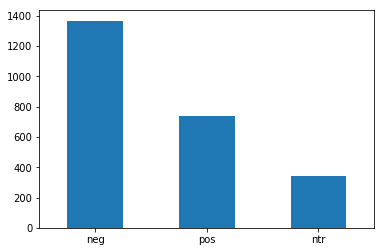

In [7]:
df['label'].value_counts().plot(kind="bar", rot=0)

# Data cleaning

In [8]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [9]:
df.loc[15,'sentence']

'আর একটা কথা না বললেই নয়,আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়।এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে।\n'

In [10]:
for i, sent  in enumerate(df['sentence'].tolist()):
    df.loc[i,'clean_sentence'] = clean_sentence(sent)

In [11]:
test = df.loc[15,'clean_sentence']
test

'আর একটা কথা না বললেই নয়আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে'

### Tokenized Sentence

In [12]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

### Remove stopwords

In [13]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [14]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : আর একটা কথা না বললেই নয়আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে
after : আর কথা না বললেই নয়আই ছি ছি সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস


In [15]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
#del df['sentence']
df.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)

### Word to Vector transformation by ngram approch

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)


word_vectorizerGram.fit_transform(df['clean_sentence'])
stpGram = word_vectorizerGram.get_feature_names()

print(len(stpGram))

41476


In [17]:
word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)

word_vectorizerGram_rsw.fit_transform(df['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()

print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[20])


36688
sample of bigram :  অংশটুকু ফাইন


In [43]:
import numpy as np
def sentence_to_vector_transform(line, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent

In [44]:
def sentence_to_vector(data, stpGram):
    dataForSVM = []
    colName = []
    dataVec = []
    dataVec.append(colName)
    
    for idx, sent in enumerate(data):
        
        sent = sentence_to_vector_transform(sent, stpGram)
        sentLst = list(sent)
        dtList = []
        try:
            dtList.append(label2id[idx])
            dataForSVM.append(sent)
        except:
            print(idx)
        for item in sentLst:
            dtList.append(item)
        lengthOfEV = len(dtList)
        dataVec.append(dtList)
        
    return dataForSVM

In [22]:
dataForSVM = sentence_to_vector(df['clean_data'], stpGram_rsw)
dataForSVM[0:4]

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

### Data split for training and testing

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataForSVM, label2id, test_size=0.2, random_state=0)

### Train Model

In [24]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train, y_train)

### Save the model

In [24]:
from sklearn.externals import joblib
filename = 'svc_model.sav'
joblib.dump(linear_svc, filename)

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['svc_model.sav']

### Accuracy Testing

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def calculate_accuracy(kernel, model):
    y_pred = model.predict(X_test)
    #print the accuracy score of the model
    print(kernel + " accuracy : ",metrics.accuracy_score(y_test, y_pred, normalize = True))
    score = confusion_matrix(y_test, y_pred)
    print('confusion_matrix: \n', score)

In [32]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer

def report(model):
    visualizer = ClassificationReport(model, classes=['Won','Loss'])
    visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
    visualizer.score(X_test, y_test) # Evaluate the model on the test data
    g = visualizer.poof() # Draw/show/poof the data

linear accuracy :  0.6959183673469388
confusion_matrix :  [[232  20  20]
 [ 41  98   8]
 [ 46  14  11]]


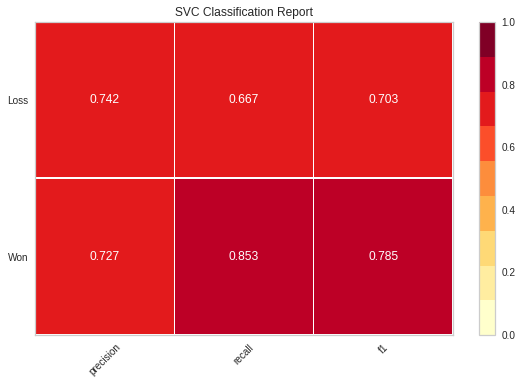

In [30]:
calculate_accuracy(kernel='linear', model=linear_svc)
report(model=linear_svc)

rbf accuracy :  0.5897959183673469
confusion_matrix: 
 [[265   6   1]
 [124  23   0]
 [ 69   1   1]]


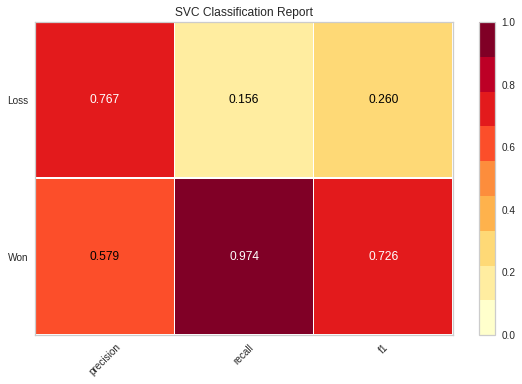

In [34]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc = rbf_svc.fit(X_train, y_train)
calculate_accuracy(kernel='rbf', model=rbf_svc)
report(model=rbf_svc)

rbf accuracy :  0.5551020408163265
confusion_matrix: 
 [[271   0   1]
 [146   1   0]
 [ 71   0   0]]


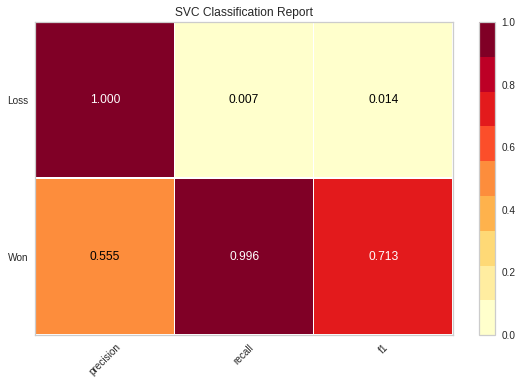

In [35]:
poly_svc = SVC(kernel='poly', degree=3, C=C)
poly_svc = poly_svc.fit(X_train, y_train)
calculate_accuracy(kernel='rbf', model=poly_svc)
report(model=poly_svc)

In [36]:
def calculate_accuracy(predictions, actual, modelName):
    total = len(predictions)
    idx = 0
    error = 0
    almostSame = 0
    while idx < total:
        if predictions[idx] != actual[idx]:
            p = predictions[idx]
            a = actual[idx]
            # print('actual=',y_test[idx],'  predict=',predictions[idx])
            if ((a == 0 or a == 1) and (p == 0 or p == 1)) or ((a == 3 or a == 4) and (p == 3 or p == 4)):
                almostSame += 1
            else:
                error += 1
        idx += 1
    print('\n', modelName, '\n')
    print("total=", total)
    print("error=", error)
    print("accuracy = ", ((total - error) * 100) / total)
    print('almost same = ', almostSame)
    print("actual accracy = ", ((total - error - almostSame) * 100) / total)

In [38]:
y_pred = linear_svc.predict(X_test)
calculate_accuracy(y_pred, y_test, 'Linear')

y_pred_rbf = rbf_svc.predict(X_test)
calculate_accuracy(y_pred_rbf, y_test, 'rbf_svc')

y_pred_poly = poly_svc.predict(X_test)
calculate_accuracy(y_pred_poly, y_test, 'poly_svc')


 Linear 

total= 490
error= 88
accuracy =  82.04081632653062
almost same =  61
actual accracy =  69.59183673469387

 rbf_svc 

total= 490
error= 71
accuracy =  85.51020408163265
almost same =  130
actual accracy =  58.97959183673469

 poly_svc 

total= 490
error= 72
accuracy =  85.3061224489796
almost same =  146
actual accracy =  55.51020408163265


In [40]:
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:

    abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=learning_rate)
    
    abc_model = abc.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(abc_model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(abc_model.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.653
Accuracy score (validation): 0.635
Learning rate:  0.075
Accuracy score (training): 0.657
Accuracy score (validation): 0.637
Learning rate:  0.1
Accuracy score (training): 0.658
Accuracy score (validation): 0.637
Learning rate:  0.25
Accuracy score (training): 0.683
Accuracy score (validation): 0.655
Learning rate:  0.5
Accuracy score (training): 0.718
Accuracy score (validation): 0.682
Learning rate:  0.75
Accuracy score (training): 0.726
Accuracy score (validation): 0.688
Learning rate:  1
Accuracy score (training): 0.737
Accuracy score (validation): 0.696


### Get output from sentence

In [25]:
sent = 'এটা আমাদের বাংলাদেশের গর্ব সাবাস বাই মোস্তাফিজ'

sent = clean_sentence(sent)
sent2vec = sentence_to_vector_transform(sent)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = joblib.load(filename)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[1]
{'neg': 0, 'pos': 1, 'ntr': 2}
pos
